<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 3*

---

# Confidence Intervals

## 🏆 학습 목표 

- ANOVA의 의미에 대해서 설명 할 수 있다.
- CLT의 의미에 대해서 설명 할 수 있다.
- 신뢰구간의 목적과 사용 예시에 대해 설명 할 수 있다.
- 추정된 통계치에 대해서 신뢰구간을 계산할 수 있다.

---



## ANOVA (one-way)

우리는 이전에 몇가지 가설검정방법들을 배웠습니다. 

- 1개 그룹의 **평균**이 특정 수와 같은 지
- 2개 그룹의 **평균**이 유의미하게 다른지

와 같은거죠

<img src='https://www.statstest.com/wp-content/uploads/2020/11/One-Way-Repeated-Measures-ANOVA.jpg' width = 500>

이번 시간에는 

- **2개 이상 그룹**의 평균에 차이가 있는지를 가설 검정하는 방법에 대해서 배워보겠습니다.





### Multiple Comparision

2개 이상의 여러 그룹을 비교하기 위해서 이런 생각을 할 수 있습니다.

> `1번 vs 2번`, `1번 vs 3번`, `2번 vs 3번`
> 을 각각 t-test 로 검정하면 되는게 아닌가?

이론상으로는 가능하지만 문제가 있습니다.

3번의 가설 검정에서 각각 통계적으로 에러가 날 확률은 **$\alpha$** 입니다.

<img src='https://i.imgur.com/8YM4KAW.png' width = 500>

즉, 3개의 가설 검정중 적어도 하나에서 에러가 날 확률은

$ {1 - (1 - \alpha)}^{3} $ 이고 $\alpha = 0.05$ 기준으로 약 $15$% 입니다. 

>m개 그룹에 대한 가설 검정이라면 
>
>$\bar{\alpha} =  {1 - (1 - \alpha)}^{m}$ , $\bar{\alpha} \leq {m \cdot {\alpha}}$ 라는 것이 수학적으로 증명되어 있습니다.

즉 여러개를 하나하나씩 비교 하는 것은 그룹수가 늘어 날 수록 에러도 커진다는 이야기죠.

<https://en.wikipedia.org/wiki/Multiple_comparisons_problem>

이렇기 때문에 여러개의 그룹을 한꺼번에 비교 하는 방법이 필요한 것입니다.

### Variation

그렇다면 **여러 그룹간의 차이가 있는지**를 확인하기 위해선 어떻게 해야할까요?

조금 생각의 단계가 생략되긴 했지만, **여러 그룹들이 하나의 분포에서부터 왔다** 라는 가정이 나오게 될 겁니다.

이를 위한 지표는 **F-statistic**이며

<https://en.wikipedia.org/wiki/F-test>

지금은 

$$ F = { {Variance-between-group} \over {Variance-with-in-group} }$$

으로 이해를 하면 좋습니다. 

그렇다면 이 F값이 높다는건 어떤 의미를 가질까요?

1. **분자(다른 그룹끼리의 분산)는 크고**, 분모 (전체 그룹의 분산)는 작아야 할겁니다.
2. 즉 **다른 그룹끼리의 분포가 다를 것이다** 라는 가정이 붙는거죠.

<img src='https://i.imgur.com/mzqdUqq.png' width = 700>

### 공식 및 계산

<https://tensorflow.blog/f-%EA%B0%92-%EC%9C%A0%EB%8F%84%EC%8B%9D/>

<https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html>

$m$ = 전체 그룹 수, $n$ = 데이터 수

$$S_{w} = \sum_{i = 1}^{m} \sum_{j=1}^{n} (x_{ij} - x_{i.})^2$$
<br>
$$x_{i.} = \sum_{j = 1}^{n} {x_{ij} / n}$$
<br>
$$S_{b} = n \sum_{i=1}^m (x_{i.} - x_{..})^2 $$
<br>
$$x_{..} = {{\sum_{i=1}^m x_{i.} } \over {m}}$$
<br>
$$F = { { S_{b}}/{(m-1)} \over S_{w} / (nm-m)}$$
<br>
$$p( {F_{m-1, nm-m}} > F_{m-1, nm-m, \alpha}) = \alpha $$

### F-stat by hand

In [1]:
import numpy as np

g1 = np.array([0, 31, 6, 26, 40])

g2 = np.array([24, 15, 12, 22, 5])

g3 = np.array([32, 52, 30, 18, 36])

In [2]:
s1 = g1.sum()
s12 = (g1**2).sum()

s2 = g2.sum()
s22 = (g2**2).sum()

s3 = g3.sum()
s32 = (g3**2).sum()

|Group|||Data|||$\sum_j{x_{ij}}$|$\sum_j{x_{ij}^2}$|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|1|0|31|6|26|40|103|3273|
|2|24|15|12|22|5|78|1454|
|3|32|52|30|18|36|168|6248|

In [3]:
m = 3
n = 5

x1 = s1 / n # 20.6
x2 = s2 / n # 15.6
x3 = s3 / n # 33.6

x = (s1 + s2 + s3) / (n+n+n) # 23.2667
xx = x**2

ssb = n * ((x1 - x)**2 + (x2-x)**2 + (x3-x)**2) # 863.3335
ssw1 = s12 + s22 + s32 # 10975

ssw = ssw1 - n*m*xx - ssb # 1991.5772

F = (ssb / (m-1)) / (ssw / (n*m - m))

print(F) # 2.60

2.6009238802972487


### F-stat by scipy

In [4]:
from scipy.stats import f_oneway

f_oneway(g1, g2, g3) # pvalue = 0.11 

F_onewayResult(statistic=2.6009238802972483, pvalue=0.11524892355706169)

## Many Samples



### 큰 수의 법칙 ( Law of large numbers )

sample 데이터의 수가 커질 수록, sample의 통계치는 점점 모집단의 모수와 같아진다. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

population = np.random.normal(50, 10, 1000) # mu = 50, sd = 1, 
population.var()

104.82605417425779

In [6]:
np.random.choice(population, 5).var()

36.338119609820964

In [7]:
np.random.choice(population, 15).var()

46.1556472489793

In [8]:
np.random.choice(population, 50).var()

109.92052767417063

In [9]:
np.random.choice(population, 100).var()

93.98186578143806

In [10]:
np.random.choice(population, 200).var()


98.7246943718007

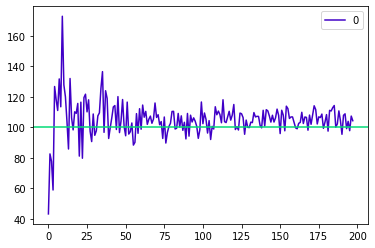

In [11]:
dat = []

for i in np.arange(start = 5, stop = 995, step = 5) :
  s = np.random.choice(population, i)
  dat.append(s.var())
dat

(pd
 .DataFrame(dat)
 .plot
 .line(color = '#4000c7')
 .axhline(y = 100, color = '#00da75')
 );

- method chaining 에 대해서 공부해보세요.

### 중심극한정리 ( Central Limit Theorem, CLT )

Sample 데이터의 수가 많아질 수록, **sample의 평균**은 정규분포에 근사한 형태로 나타난다.

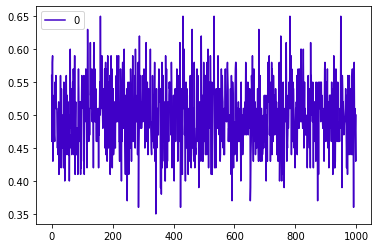

In [12]:
sample_means = []

for x in range(0, 1000):
  coinflips = np.random.binomial(n = 1, p = 0.5, size = 100) # binomial distribution
  sample_means.append(coinflips.mean())

pd.DataFrame(sample_means).plot(color = '#4000c7');

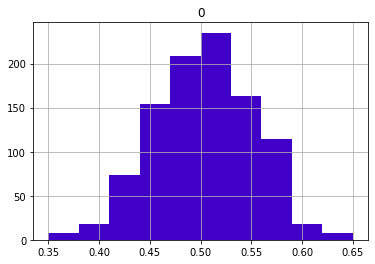

In [13]:
pd.DataFrame(sample_means).hist(color = '#4000c7');

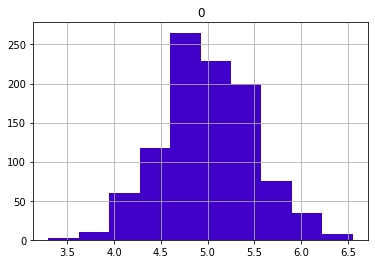

In [14]:
sample_means2 = []

for x in range(0,1000):
  one_poiss = np.random.poisson(5, 20) # Poisson 분포 데이터
  sample_means2.append(one_poiss.mean())

pd.DataFrame(sample_means2).hist(color = '#4000c7');

In [15]:
# normal distribution에 대해서도 실행해보세요.

sampling을 몇번 하느냐도 중요하지만, sampling을 얼마나 하느냐도 다릅니다.


In [16]:
sample_means_small = []
sample_means_medium = []
sample_means_large = []

# b(n, p)
# N(0,1) ~ N(u, sd)

for x in range(0, 3000):
  coinflips_small = np.random.binomial(n = 1, p = .5, size = 10)
  coinflips_medium = np.random.binomial(n = 1, p = .5, size = 50)
  coinflips_large = np.random.binomial(n = 1, p = .5, size = 200)
  sample_means_small.append(coinflips_small.mean())
  sample_means_medium.append(coinflips_medium.mean())
  sample_means_large.append(coinflips_large.mean())

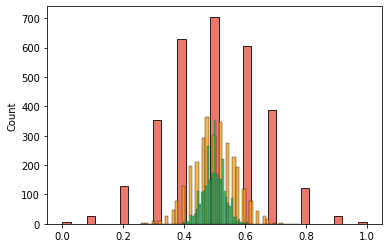

In [17]:
import seaborn as sns
ax = plt.subplots()

sns.histplot(sample_means_small, color = '#e74c3c')

sns.histplot(sample_means_medium, color = '#f39c12')

sns.histplot(sample_means_large, color = '#27ae60');
  
# sample_means_small -> red 
# sample_means_medium -> orange
# sample_means_large -> green

## Point estimate VS Interval estimate

ex) 초등학교 3학년 1000명의 평균 키.

130cm일 것이다.

125 ~ 135cm 정도 일 것이다.

120 ~ 140cm 정도 일 것이다.

1cm ~ 300cm 정도 일 것이다. 

--- 

예측 하는 "구간"이 **넓어질 수록** 맞을 확률(`신뢰도`)은 올라감. 




## 신뢰도 

> 신뢰도가 95% 라는 의미는 표본을 100번 뽑았을때 95번은 신뢰구간 내에 모집단의 평균이 포함된다.

앞에 예시를 다시 한번 읽어보고 윗 문장의 의미를 생각해보시길 바랍니다.



## 신뢰 구간의 설정 및 해석

<img src='https://i.imgur.com/dbhRomh.png' width = 550> 

이 구간을 수학적으로 표현한 내용이 아래의 식과 같으며

$$\bar {x} \pm {t \cdot {s \over \sqrt{n} } }$$

<br>

- $\bar{x}$ 를 `estimated mean`.

- $ {t \cdot {s \over \sqrt{n} } }$ 를 `error`라 부릅니다.



In [18]:
from scipy import stats

def confidence_interval(data, confidence = 0.95):
  
  """
  주어진 데이터의 표본 **평균**에 대한 신뢰구간을 계산.
  기본 값으로 t-분포와 양방향 (two-tailed), 95%의 신뢰도를 사용합니다. 
  
  입력 값 : 
    data - 여러 개로 이루어진 (list 혹은 numpy 배열) 표본 관측치
    confidence - 신뢰구간을 위한 신뢰도 
  
  반환 되는 값:
    (평균, 하한, 상한구간)으로 이루어진 tuple
  """

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  
  # std / sqrt(n)
  stderr = stats.sem(data) 
  # Standard Error of Mean (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html)
  # s / sqrt(n)

  # length_of_one_interval
  interval = stderr * stats.t.ppf( (1 + confidence) / 2 , n - 1) # ppf : inverse of cdf
  return (mean, mean - interval, mean + interval)

# cdf -> t 를 넣으면 %
# ppf -> % 를 넣으면 t

# 1 + 0.95 / 2 -> 0.975
# (1 - 0.95) / 2 -> 0.025

In [19]:
np.random.seed(123)

data2 = np.random.normal(50, 10, 1000)

sample = np.random.choice(data2, 10)

confidence_interval(sample)

(44.28501220284126, 37.93312500671013, 50.63689939897239)

In [20]:
confidence_interval(np.random.choice(data2, 3))

(54.44720084005697, 21.73030800723631, 87.16409367287764)

In [21]:
confidence_interval(np.random.choice(data2, 30))

(49.75170708068175, 46.21251606095514, 53.290898100408356)

## 신뢰구간의 시각화 (시각화의 이해를 위해 평균 50으로 조정)


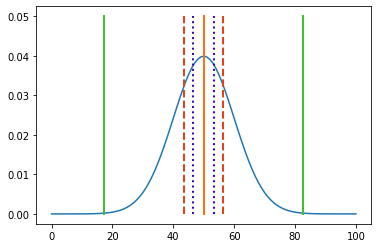

In [22]:
x = np.linspace(0, 100, 101) # 0 ~ 100 by 100 

y = stats.norm(50, 10).pdf(x) 

# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html 참조

# plt.plot([A, A], [B, C]) : (A, B) ~ (A,C) 까지의 Line

plt.plot(x, y) # blue line

plt.plot([50, 50], [0, 0.05], 'k-', lw = 2, color = '#ff6f15') 

# 30 sample
plt.plot([53.54,53.54], [0, 0.05], 'k:', lw = 2, color = '#4000c7')
plt.plot([46.46,46.46], [0, 0.05], 'k:', lw = 2, color = '#4000c7');

# 10 sample
plt.plot([56.35,56.35], [0, 0.05], 'k--', lw = 2, color = '#e84118')
plt.plot([43.65,43.65], [0, 0.05], 'k--', lw = 2, color = '#e84118');

# 3 sample

plt.plot([82.72,82.72], [0, 0.05], 'k-', lw = 2, color = '#44bd32')
plt.plot([17.29,17.29], [0, 0.05], 'k-', lw = 2, color = '#44bd32');

## CI with scipy

In [23]:
np.random.seed(123)

data2 = np.random.normal(50, 10, 1000)

sample = np.random.choice(data2, 10)

confidence_interval(sample)

(44.28501220284126, 37.93312500671013, 50.63689939897239)

$$\bar {x} \pm {t \cdot {s \over \sqrt{n} } }$$

In [24]:
from scipy.stats import t

# 표본의 크기
n = len(sample)
# 자유도
dof = n-1
# 평균의 평균
mean = np.mean(sample)
# 표본의 표준편차
sample_std = np.std(sample, ddof = 1)
# 표준 오차
std_err = sample_std / n ** 0.5 # sample_std / sqrt(n)

CI = t.interval(.95, dof, loc = mean, scale = std_err) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html
print("95% 신뢰구간: ", CI)

95% 신뢰구간:  (37.93312500671013, 50.63689939897239)
